In [1]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Mounted at /content/drive


In [2]:
import os
from tqdm import tqdm
from tensorflow import keras
import tensorflow as tf
import numpy as np

In [3]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset'

In [4]:
all_images = []
all_labels = []

for folder in os.listdir(dataset_path):
  folder_path = os.path.join(dataset_path, folder)
  print(folder)

  for file in tqdm(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, file)

    image = tf.keras.preprocessing.image.load_img(file_path)
    image = np.array(image)
    image = tf.convert_to_tensor(image)

    image = tf.image.resize(image, [128, 128])

    all_images.append(image)
    all_labels.append(folder)

0


100%|██████████| 360/360 [00:14<00:00, 24.58it/s]


1


100%|██████████| 108/108 [00:10<00:00, 10.68it/s]


6


100%|██████████| 965/965 [00:43<00:00, 22.40it/s]


3


100%|██████████| 312/312 [00:05<00:00, 55.26it/s] 


2


100%|██████████| 87/87 [00:39<00:00,  2.22it/s]


5


100%|██████████| 274/274 [00:11<00:00, 24.01it/s]


4


100%|██████████| 457/457 [00:16<00:00, 27.41it/s] 


In [5]:
num_of_classes = 7
all_labels = np.asarray(all_labels, dtype=np.float32)
all_labels = keras.utils.to_categorical(all_labels, num_of_classes)

In [6]:
all_images = np.asarray(all_images, dtype=np.float32)

In [7]:
print('All images: ', all_images.shape)
print('All labels: ', all_labels.shape)

All images:  (2563, 128, 128, 3)
All labels:  (2563, 7)


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_images, test_val_images, train_labels, test_val_labels = train_test_split(all_images,
                                                                                all_labels,
                                                                                test_size=0.3,
                                                                                random_state=42)

test_images, val_images, test_labels, val_labels = train_test_split(test_val_images,
                                                                    test_val_labels,
                                                                    test_size=0.5,
                                                                    random_state=42)

print('Train data: ', train_images.shape, train_labels.shape)
print('Val data: ', val_images.shape, val_labels.shape)
print('Test data: ', test_images.shape, test_labels.shape)

Train data:  (1794, 128, 128, 3) (1794, 7)
Val data:  (385, 128, 128, 3) (385, 7)
Test data:  (384, 128, 128, 3) (384, 7)


Label array: [0. 0. 1. 0. 0. 0. 0.] 
Label: 2 
Emotion: Fear 
Image shape: (128, 128, 3)


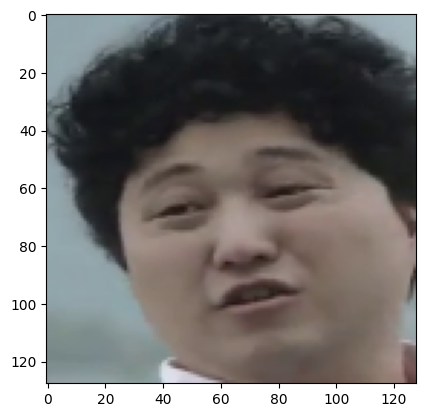

In [10]:
emotions = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

index = 15
print('Label array:', train_labels[index],
      '\nLabel:', np.argmax(train_labels[index]),
      '\nEmotion:', emotions[np.argmax(train_labels[index])],
      '\nImage shape:', train_images[index].shape)

plt.imshow(np.asarray(train_images[index], dtype='uint8'))
plt.show()

In [11]:
# normalization
train_images /= 255
val_images /= 255
test_images /= 255

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, models, optimizers

In [13]:
image_input_shape = (128, 128, 3)

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=image_input_shape))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

In [14]:
batch_size = 256
epochs = 10

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
history=model.fit(
    train_images,train_labels,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(val_images,val_labels),
    verbose=1
)

Epoch 1/10
8/8 [==============================] - 67s 3s/step - loss: 2.9221 - accuracy: 0.1472 - val_loss: 1.9842 - val_accuracy: 0.1091
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 2.6509 - accuracy: 0.1823 - val_loss: 2.1487 - val_accuracy: 0.1169
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 2.7410 - accuracy: 0.1611 - val_loss: 2.3976 - val_accuracy: 0.1740
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 2.7044 - accuracy: 0.1672 - val_loss: 2.8567 - val_accuracy: 0.1481
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 2.6532 - accuracy: 0.1577 - val_loss: 3.8864 - val_accuracy: 0.1429
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 2.5666 - accuracy: 0.1728 - val_loss: 15.5542 - val_accuracy: 0.1532
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 2.5705 - accuracy: 0.1739 - val_loss: 11.5318 - val_accuracy: 0.1558
Epoch 8/10
8/8 [================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


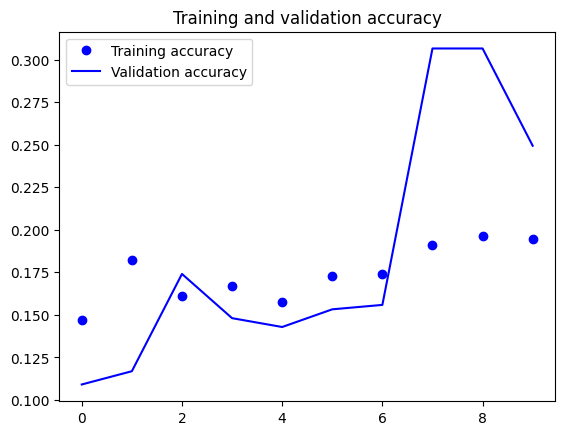

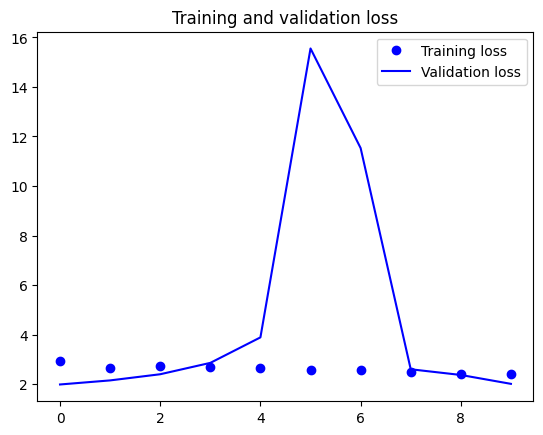

In [16]:
print(history.history.keys())
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)),train_accuracy,'bo',label='Training accuracy')
plt.plot(list(range(epochs)),val_accuracy,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(epochs)),train_loss,'bo',label='Training loss')
plt.plot(list(range(epochs)),val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Loss:', loss, '\nAccuracy:', accuracy * 100, '%')

12/12 [==============================] - 3s 41ms/step - loss: 1.9350 - accuracy: 0.3281
Loss: 1.9350465536117554 
Accuracy: 32.8125 %


Image shape: (128, 128, 3)
True Image Label Array: [1. 0. 0. 0. 0. 0. 0.] 
True Image Label Shape: (7,) 
True Image Label: Angry


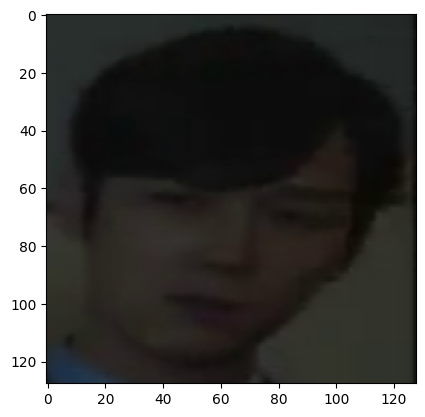

1/1 [==============================] - 1s 968ms/step
Predicted Image Label Array: ['0.22', '0.17', '0.09', '0.09', '0.05', '0.16', '0.21'] 
Predicted Image Label Shape: (1, 7) 
Predicted Image Label: Angry


In [18]:
img_id = 0

sample_test_image = test_images[img_id]
sample_test_label = test_labels[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label,
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', emotions[np.argmax(sample_test_label)])
plt.imshow(sample_test_image)
plt.show()



prediction = model.predict(sample_test_image.reshape(1, 128, 128, 3))

print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape,
      '\nPredicted Image Label:', emotions[np.argmax(prediction)])